In [ ]:
#Kütüphane İmport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#verileri yükleme
data=pd.read_csv("shopping_trends.csv")

In [ ]:
#İlk birkaç satırı görüntüleme
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#Veri yapısı hakkında genel bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
#İstatiksel özet
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
#Veri boyutu alma
data.shape

(3900, 19)

In [ ]:
#Eksik veri kontrolü
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Veri Seti Özellikleri
Kolonlar: Veri seti toplamda 19 sütundan oluşuyor, örnekler:

Customer ID: Müşteri kimliği.
Age: Müşteri yaşı.
Category: Satın alınan ürünün kategorisi (örneğin, "Clothing", "Footwear").
Purchase Amount (USD): Satın alma tutarı (USD).
Review Rating: Kullanıcı değerlendirme puanı.
Boyut: 3900 satır ve 19 sütun.

Eksik Veri
Veride herhangi bir eksik veri bulunmuyor.
Veri Türleri
Sayısal sütunlar: Age, Purchase Amount (USD), Previous Purchases.
Kategorik sütunlar: Gender, Category, Location, Payment Method, vb.
İlk 5 Satır
Verinin ilk 5 satırı incelendiğinde, müşteri alışveriş davranışlarına dair çeşitli bilgiler yer alıyor.



Temel İstatistik Analizi

Sayısal Değerler

Müşteriler ortalama olarak:

44 yaşında, 18 ile 70 arasında.

59.76 USD harcıyor (min: 20 USD, max: 100 USD).

25 adet önceki satın alma geçmişine sahip (min: 1, max: 50).

Kategorik Değerler

Cinsiyet: 2652 erkek, 1248 kadın.

Kategori Dağılımı:


Clothing: 1737 ürünle en popüler kategori.

Accessories: 1240 adetle ikinci sırada.

Footwear: 599 adet.

Outerwear: 324 adet.

Boyutlar: En yaygın boyut M (1755 ürün).

Renkler: En sık tercih edilen renk Olive (177 ürün).

Sezonlar:

En çok satış İlkbahar (999 adet) ve Sonbahar (975 adet) sezonlarında.

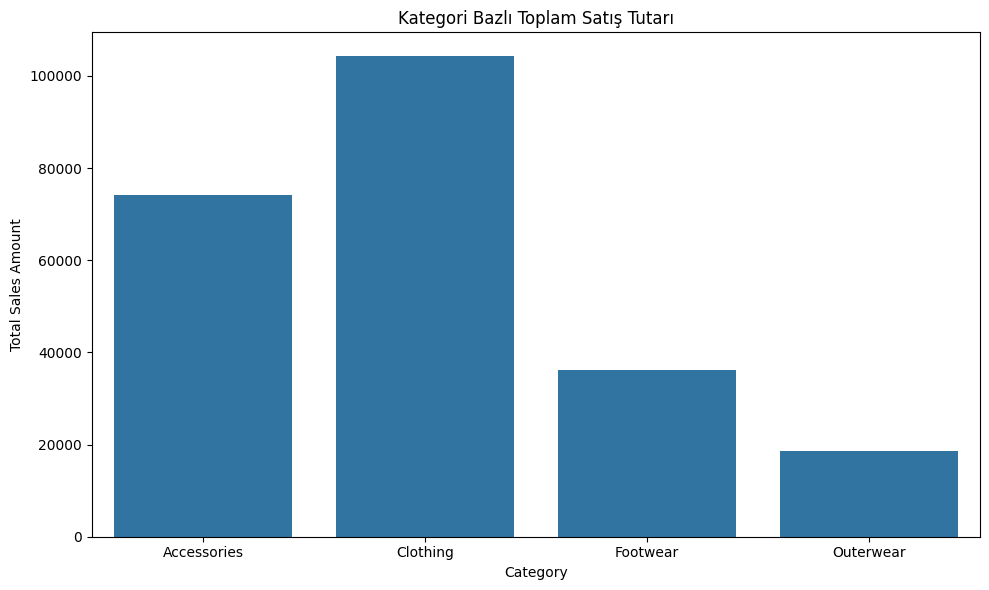

In [ ]:
#Tüm kategoriler bazında satın alma tutarını inceleyelim
category_sales_amount=data.groupby("Category")["Purchase Amount (USD)"].sum()

#Şimdi görselleştirmesini yapalım
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales_amount.index,y=category_sales_amount.values)
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.title('Kategori Bazlı Toplam Satış Tutarı')
plt.tight_layout()


Bu görselleştirmede,her kategori için toplam satın alma tutarını gördük.Özellikle Clothing kategorisi,diğer kateogirele göre en yüksek toplam harcama ile lider konumundadır

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

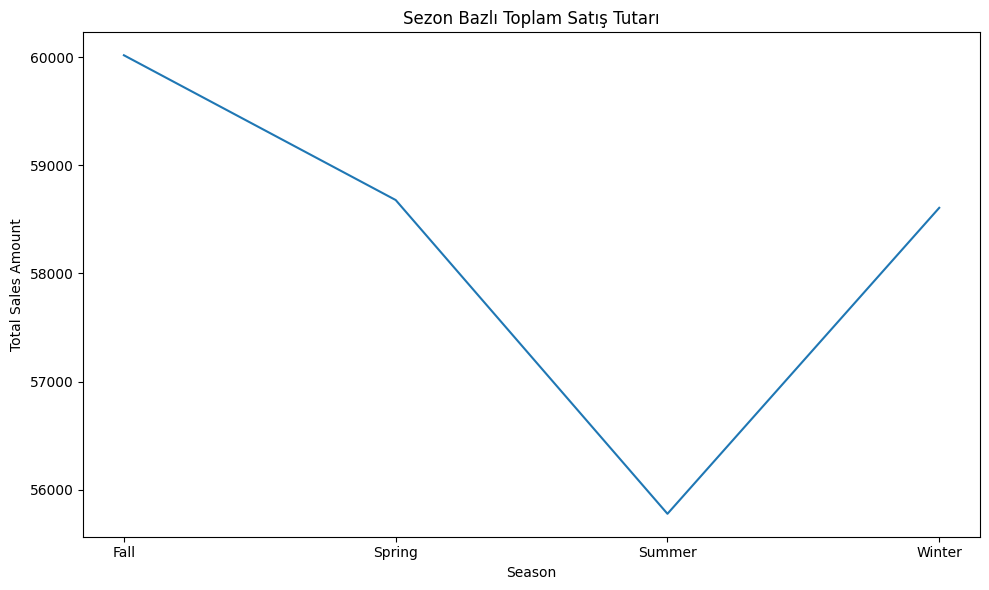

In [ ]:
#Sezon bazlı toplam satın alma tutarına bakalım
season_sales_amount=data.groupby("Season")["Purchase Amount (USD)"].sum()

#Görselleştirmelerini yapalım
plt.figure(figsize=(10,6))
sns.lineplot(x=season_sales_amount.index,y=season_sales_amount.values)
plt.xlabel("Season")
plt.ylabel("Total Sales Amount")
plt.title('Sezon Bazlı Toplam Satış Tutarı')
plt.tight_layout()
plt

Görselleştirme Sonucu:

1-Sonbahar en çok satın almanın yapıldığı dönem iken en az harcama yapılan dönem yaz sezonu olarak görülmektedir.

Text(0, 0.5, 'Total Sales Amount')

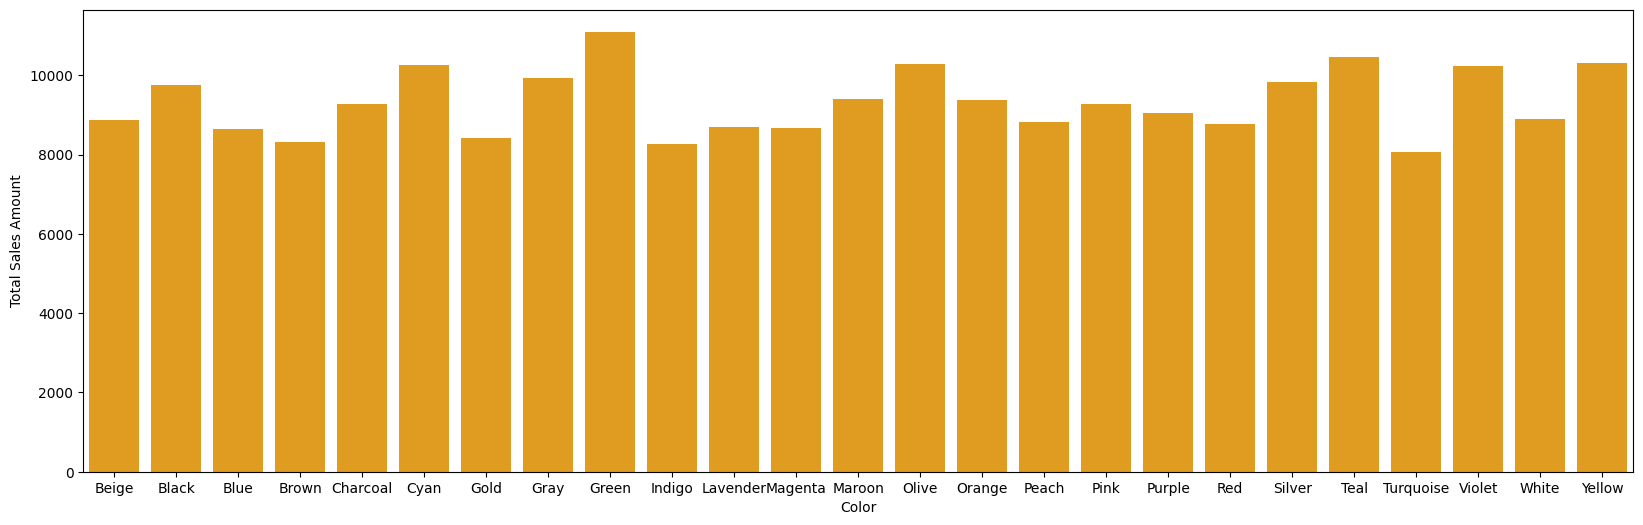

In [ ]:
#Renk bazlı satışları alalım
color_sales_amount=data.groupby('Color')["Purchase Amount (USD)"].sum()

#Görselleştirmesini alalım
plt.figure(figsize=(20,6))
sns.barplot(x=color_sales_amount.index,y=color_sales_amount.values,color="orange")
plt.xlabel("Color")
plt.ylabel("Total Sales Amount")

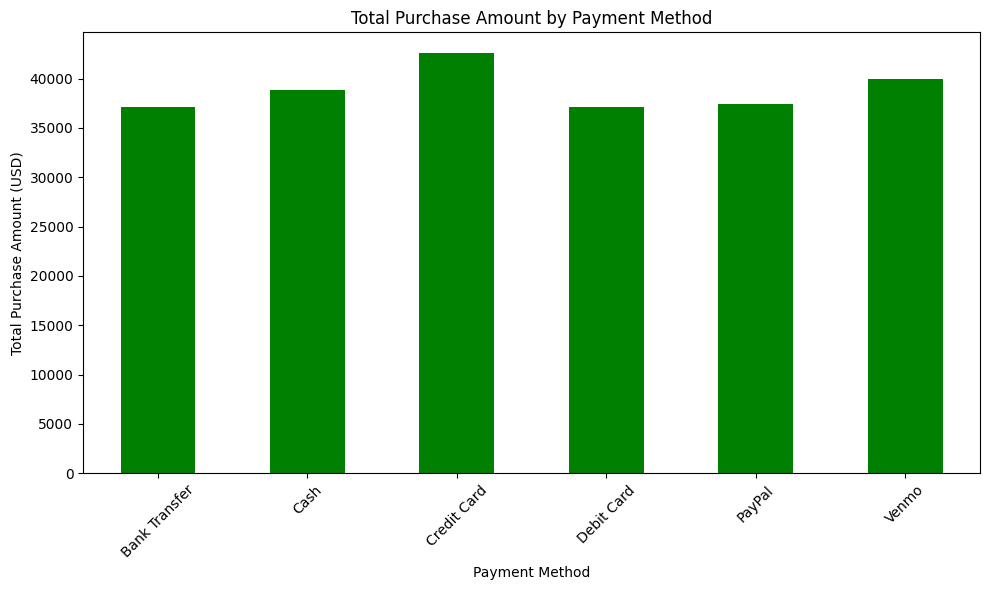

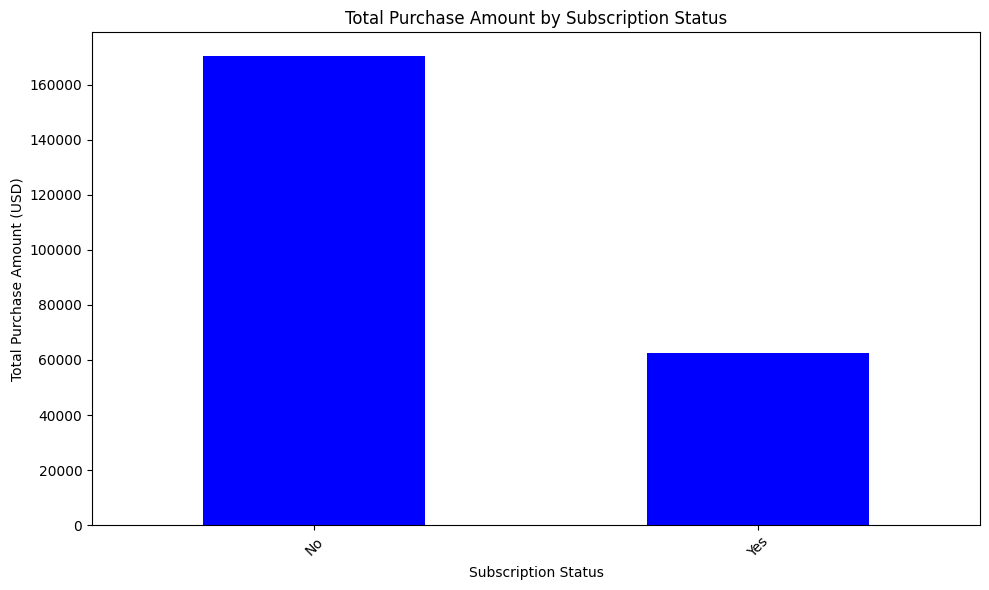

In [ ]:
# Ödeme yöntemine göre satın alma tutarlarını inceleyelim.
payment_sales = data.groupby('Payment Method')['Purchase Amount (USD)'].sum()

#Görselleştirmesini yapalım
plt.figure(figsize=(10, 6))
payment_sales.plot(kind='bar', title='Total Purchase Amount by Payment Method', color='green')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Abonelik yöntemine göre total satış oranını bakalım.
subscription_sales = data.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

#Görselleştirme
plt.figure(figsize=(10, 6))
subscription_sales.plot(kind='bar', title='Total Purchase Amount by Subscription Status', color='blue')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Subscription Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Kredi kartı ve Venmo ödeme yöntemi ağırlıkla tercih edilirken Debit card ve paypal daha az tercih edilmektedir.Satın alma ağırlıkla üye olmayan kişiler tarafından gerçekleştirilmekte olup abone sayısını arttırma amaçlı kampanya ve ayrıcalıklı çalışmaların yürütülmesi satışları arttıracaktır.

In [ ]:
import pandas as pd
import folium

# CSV dosyasını oku
df = pd.read_csv('shopping_trends.csv')

# Lokasyon bilgilerini içeren bir veri çerçevesi oluştur
location_data = df[['Location', 'Purchase Amount (USD)']]

# Lokasyonları ve toplam satın alma miktarlarını gruplandır
location_summary = location_data.groupby('Location').sum().reset_index()




# Tüm ABD eyaletleri için koordinatlar
location_coords = {
    'Alabama': [32.3182, -86.9023], 'Alaska': [64.2008, -149.4937], 'Arizona': [34.0489, -111.0937],
    'Arkansas': [35.2010, -91.8318], 'California': [36.7783, -119.4179], 'Colorado': [39.5501, -105.7821],
    'Connecticut': [41.6032, -73.0877], 'Delaware': [38.9108, -75.5277], 'Florida': [27.9944, -81.7603],
    'Georgia': [32.1656, -82.9001], 'Hawaii': [19.8968, -155.5828], 'Idaho': [44.0682, -114.7420],
    'Illinois': [40.6331, -89.3985], 'Indiana': [40.2672, -86.1349], 'Iowa': [41.8780, -93.0977],
    'Kansas': [39.0119, -98.4842], 'Kentucky': [37.8393, -84.2700], 'Louisiana': [30.9843, -91.9623],
    'Maine': [45.2538, -69.4455], 'Maryland': [39.0458, -76.6413], 'Massachusetts': [42.4072, -71.3824],
    'Michigan': [44.3148, -85.6024], 'Minnesota': [46.7296, -94.6859], 'Mississippi': [32.3547, -89.3985],
    'Missouri': [37.9643, -91.8318], 'Montana': [46.8797, -110.3626], 'Nebraska': [41.4925, -99.9018],
    'Nevada': [38.8026, -116.4194], 'New Hampshire': [43.1939, -71.5724], 'New Jersey': [40.0583, -74.4057],
    'New Mexico': [34.5199, -105.8701], 'New York': [40.7128, -74.0060], 'North Carolina': [35.7596, -79.0193],
    'North Dakota': [47.5515, -101.0020], 'Ohio': [40.4173, -82.9071], 'Oklahoma': [35.0078, -97.0929],
    'Oregon': [43.8041, -120.5542], 'Pennsylvania': [41.2033, -77.1945], 'Rhode Island': [41.5801, -71.4774],
    'South Carolina': [33.8361, -81.1637], 'South Dakota': [43.9695, -99.9018], 'Tennessee': [35.5175, -86.5804],
    'Texas': [31.9686, -99.9018], 'Utah': [39.3200, -111.0937], 'Vermont': [44.5588, -72.5778],
    'Virginia': [37.4316, -78.6569], 'Washington': [47.7511, -120.7401], 'West Virginia': [38.5976, -80.4549],
    'Wisconsin': [43.7844, -88.7879], 'Wyoming': [43.0759, -107.2903]
}


# Harita oluştur
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Lokasyonları haritada işaretle
for index, row in location_summary.iterrows():
    location = row['Location']
    if location in location_coords:
        coords = location_coords[location]
        folium.Marker(
            location=coords,
            popup=f"{location}: ${row['Purchase Amount (USD)']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map)

# Haritayı kaydet
map.save('shopping_trends_map.html')
print("Harita başarıyla oluşturuldu ve shopping_trends_map.html olarak kaydedildi.")






Harita başarıyla oluşturuldu ve shopping_trends_map.html olarak kaydedildi.
